In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from textwrap import wrap

### Simple EDA

In [4]:
df = pd.read_csv("./usa-v1-preprocessed.csv")
df.head()

,Unnamed: 0,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people..."
1,1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost..."
2,2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa..."
3,3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin..."
4,4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma..."


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348335 entries, 0 to 348334
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Text                               348335 non-null  object
 1   new_text                           348335 non-null  object
 2   languages                          348335 non-null  object
 3   pos_tagged_words                   348335 non-null  object
 4   words_processed_all                348335 non-null  object
 5   words_processed_noun_adj_verb_adv  348335 non-null  object
 6   words_processed_noun               348335 non-null  object
dtypes: object(7)
memory usage: 18.6+ MB


In [7]:
df[df.duplicated()==True]

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun


In [8]:
df.describe()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
count,348335,348335,348335,348335,348335,348335,348335
unique,348335,348328,1,345011,343372,339375,295280
top,want find way end racism try force people inje...,pfizer did not take government money.,ENGLISH,[],[],[],[]
freq,1,2,348335,362,432,1164,9582


In [10]:
df.dtypes

Text                                 object
new_text                             object
languages                            object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [44]:
df["category"].value_counts()

alternative eggs, meat & seafood    28535
dairy alternatives                  24473
snacks                              12582
frozen                               7180
body & skincare                      7017
cosmetics & nails                    1247
pantry                                  7
Name: category, dtype: int64

In [11]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin..."
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma..."


### Sentence Length Distribution

In [22]:
sns.set(rc = {'figure.figsize':(6,6)})


Max length: 301, Min length: 1, Average Length :  147.8478906799489


<AxesSubplot:>

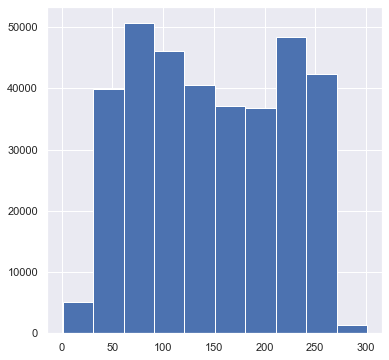

In [15]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [16]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["Text"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [17]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",43
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",21
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",45
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",38
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",40


In [18]:
df["word_count"].describe()

count    348335.000000
mean         23.981753
std          11.556416
min           1.000000
25%          14.000000
50%          23.000000
75%          34.000000
max          88.000000
Name: word_count, dtype: float64

<AxesSubplot:>

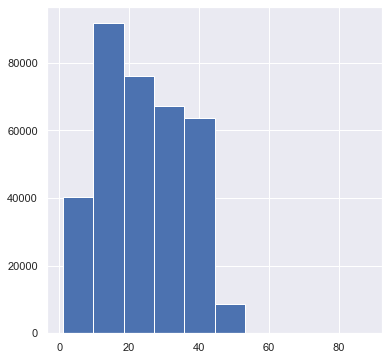

In [19]:
#word length distribution
df['word_count'].hist()

### Wordclouds

#### Text before preprocessing

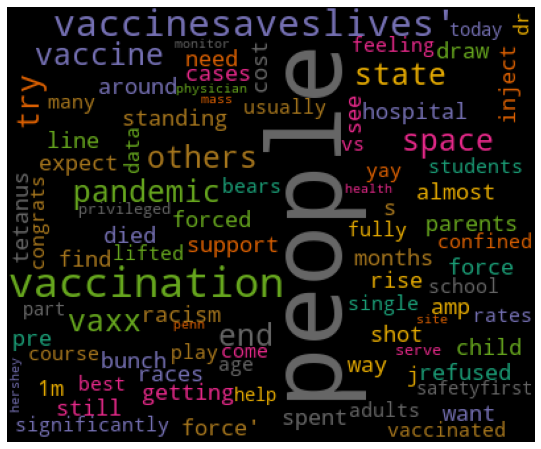

In [33]:
#overall wordcloud of text without preprocessing 

text = df['Text'].values 
wordcloud = WordCloud(width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Preprocessed: All pos tags

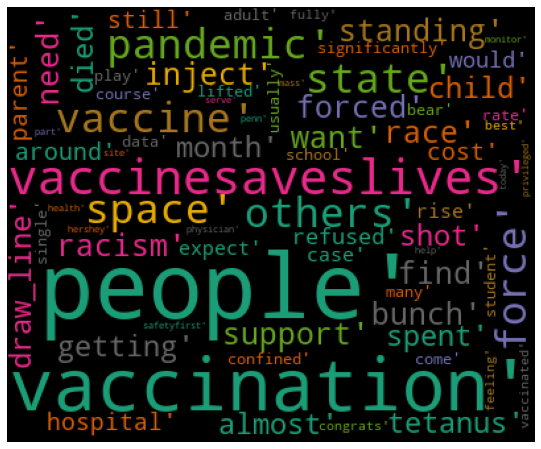

In [35]:
#overall wordcloud of text without preprocessing 

text = df['words_processed_all'].values 
wordcloud = WordCloud(width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Preprocessed: Noun, adjective, word, adverb

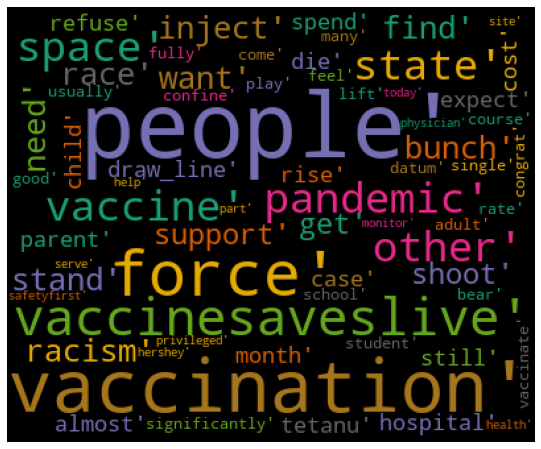

In [36]:
text = df['words_processed_noun_adj_verb_adv'].values 
wordcloud = WordCloud(width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Preprocessed: Noun

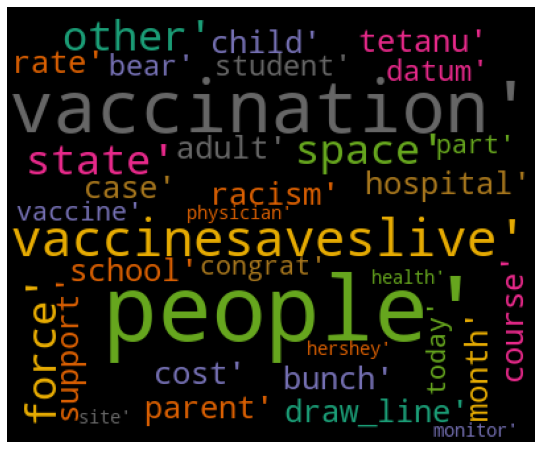

In [37]:
text = df['words_processed_noun'].values 
wordcloud = WordCloud(width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Polarity

In [29]:
from textblob import TextBlob
df['polarity']=df['words_processed_all'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [30]:
df["polarity"].describe()

count    348335.000000
mean          0.065629
std           0.264176
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.200000
max           1.000000
Name: polarity, dtype: float64

<AxesSubplot:>

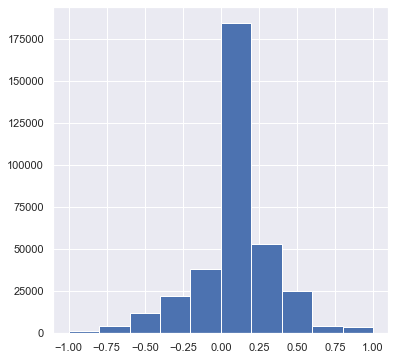

In [31]:
#polarity distribution
df['polarity'].hist()